In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bmm import MVBetaMM

We begin by randomly generating data from 4 independent beta distributions

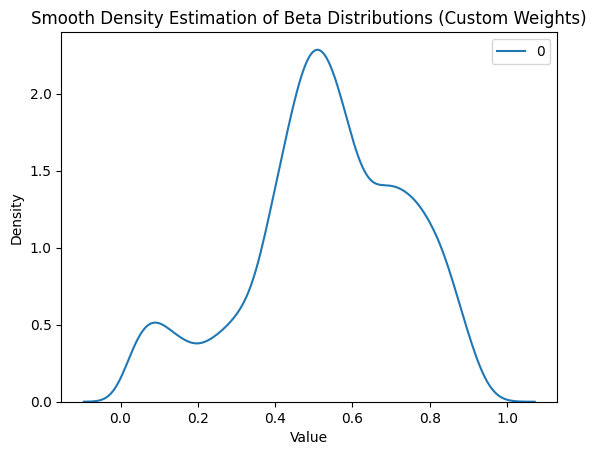

In [2]:
# Random State
random_state = np.random.RandomState(42)

# Parameters for the beta distributions
alpha = [2, 30, 11, 6]          # Alpha parameters
beta = [14, 30, 4, 6]           # Beta parameters
weights = [0.1, 0.2, 0.3, 0.4]  # Custom weights for each distribution
num_samples = 10000             # Number of samples to generate

# Set random state for reproducibility
random_state = np.random.RandomState(42)

# Generate data from beta distributions based on weights
data = []
for a, b, weight in zip(alpha, beta, weights):
    num_samples_dist = int(num_samples * weight)
    samples = random_state.beta(a, b, num_samples_dist)
    data.append(samples)

# Make it into a row vector
X = np.concatenate(data).reshape(-1, 1)

# Plot the data
sns.kdeplot(X)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth Density Estimation of Beta Distributions (Custom Weights)')
plt.show()

Now, we can use a MVBeta Mixture Model to try and approximate this distribution

In [3]:
models = []
n_mixtures = range(2, 9, 1)

for n in n_mixtures:
    bmm = MVBetaMM(n)
    bmm.fit(X, max_iter=1000)
    models.append(bmm)

Converged after 638 iterations


We can now plot the simulated distributions to visually assess the performance.

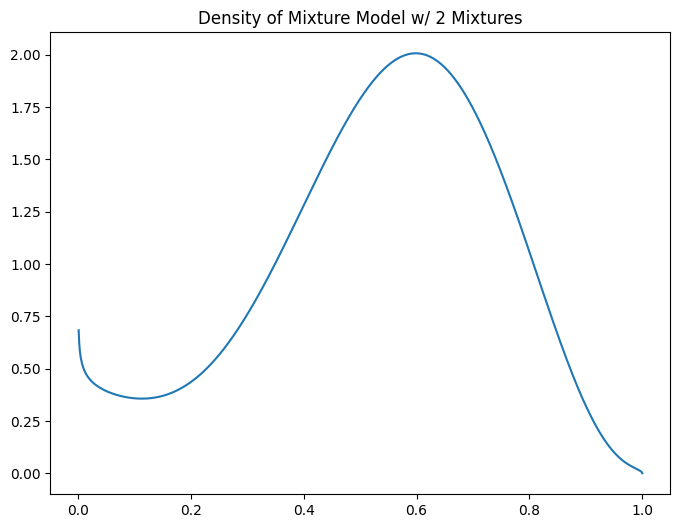

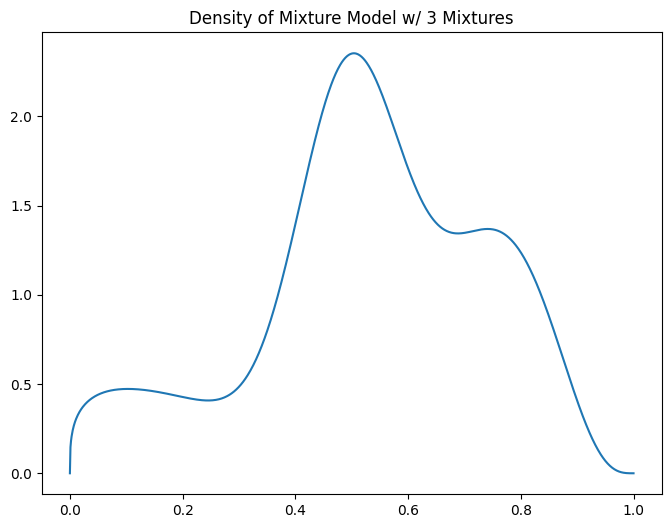

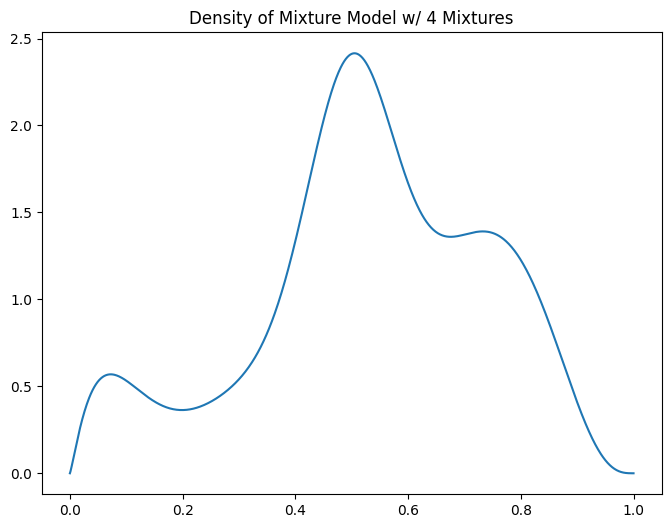

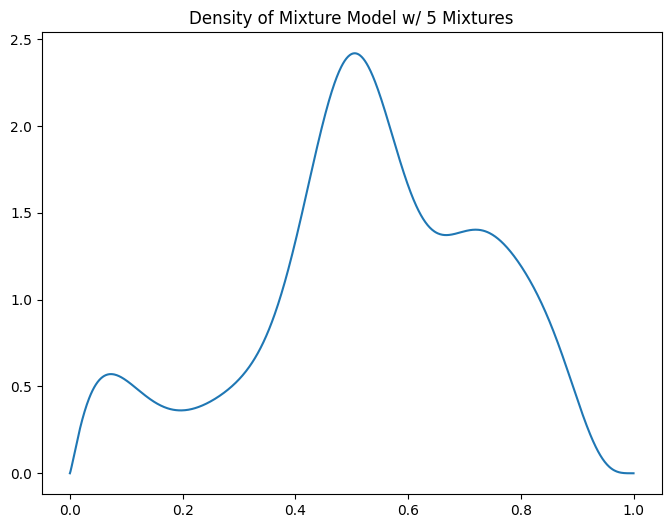

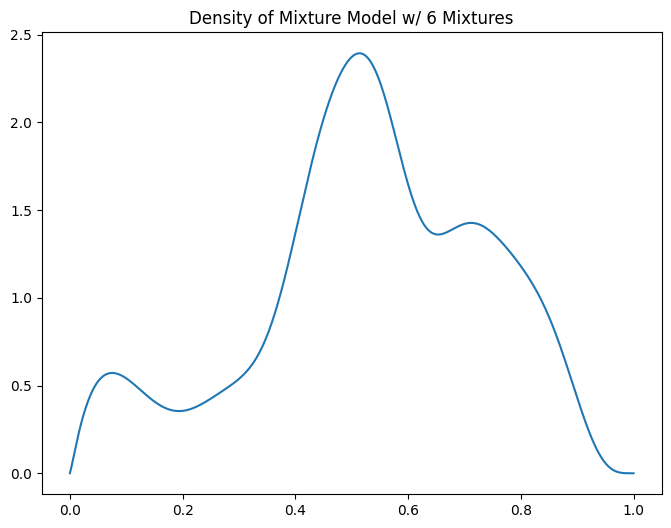

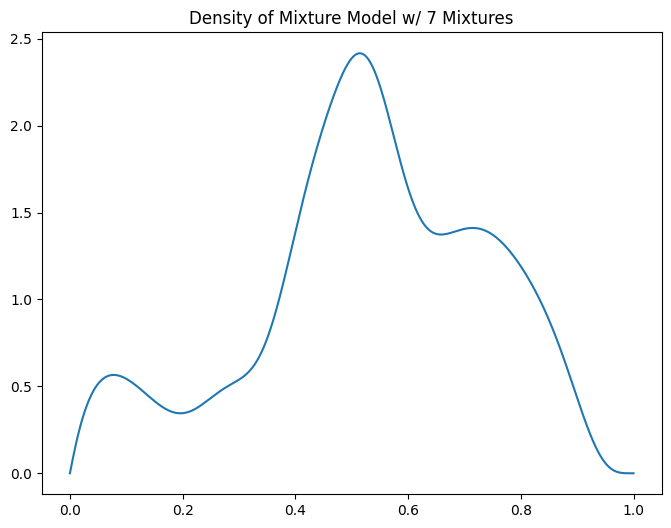

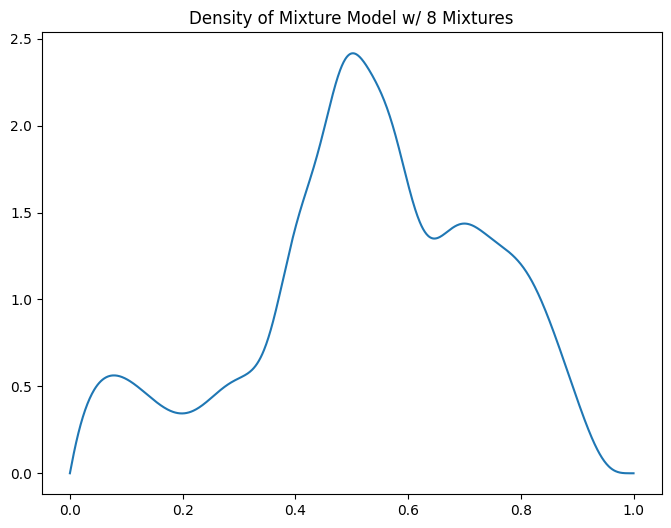

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import beta

for model in models:
    x = np.linspace(0, 1, 1000) # Points at which to evaluate the density
    mixture_density = np.zeros_like(x)
    for i in range(model.n_mixtures):
        a = model.params_[i, 0]
        b = model.params_[i, 1]
        mixture_density += model.weights_[i] * beta.pdf(x, a, b)

    plt.figure(figsize=(8, 6))
    plt.plot(x, mixture_density)
    plt.title(f'Density of Mixture Model w/ {model.n_mixtures} Mixtures')
    plt.show()

Obviously, matching the number of true underlying distributions looks to perform very well. More mixtures begins to overfit the data, but still does a pretty good job of matching the distribution.